### imports

In [29]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


# exploration

In [30]:
data = pd.read_csv('train.csv')
data.set_index('id')
Y = data.loc[:,'purchase']
X = data.iloc[:, :-1]
print('first glance:')
data.head(5)

first glance:


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0


In [31]:
print("** types: **")
print(data.dtypes)

print('\n** label values: **\n',Y.value_counts())
print(f'purchased sessions are around {int((Y.loc[Y == 1].shape[0] / Y.shape[0]) * 100)}% of all sessions')

** types: **
id                         int64
num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration        object
num_of_product_pages     float64
product_page_duration     object
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                         object
B                        float64
C                         object
D                        float64
purchase                   int64
dtype: object

** label values: **
 0    8858
1    1621
Name: purchase, dtype: int64
purchased sessions are around 15% of all sessions


### page durations

In [34]:
fields = ['info_page_duration', 'product_page_duration']

for field in fields:
    print(field, 'str structure:', data[field].value_counts().index[0])
    

    # make sure all durations are in minutes
    print('not minutes count: ', len(data.loc[~data[field].str.contains('minutes').astype('bool'),(field)]))


    # convert to float `type(d)==str ` handles nan values
    data[field] = [float(d.split()[0]) if type(d)==str else np.nan for d in data[field]]

print('new types:')
data.dtypes[fields]


new types:


info_page_duration       float64
product_page_duration    float64
dtype: object

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'num_of_admin_pages'}>,
        <AxesSubplot:title={'center':'admin_page_duration'}>,
        <AxesSubplot:title={'center':'num_of_info_pages'}>],
       [<AxesSubplot:title={'center':'info_page_duration'}>,
        <AxesSubplot:title={'center':'num_of_product_pages'}>,
        <AxesSubplot:title={'center':'product_page_duration'}>,
        <AxesSubplot:title={'center':'total_duration'}>],
       [<AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>,
        <AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'closeness_to_holiday'}>],
       [<AxesSubplot:title={'center':'device'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'D'}>],
       [<AxesSubplot:title={'center':'purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=

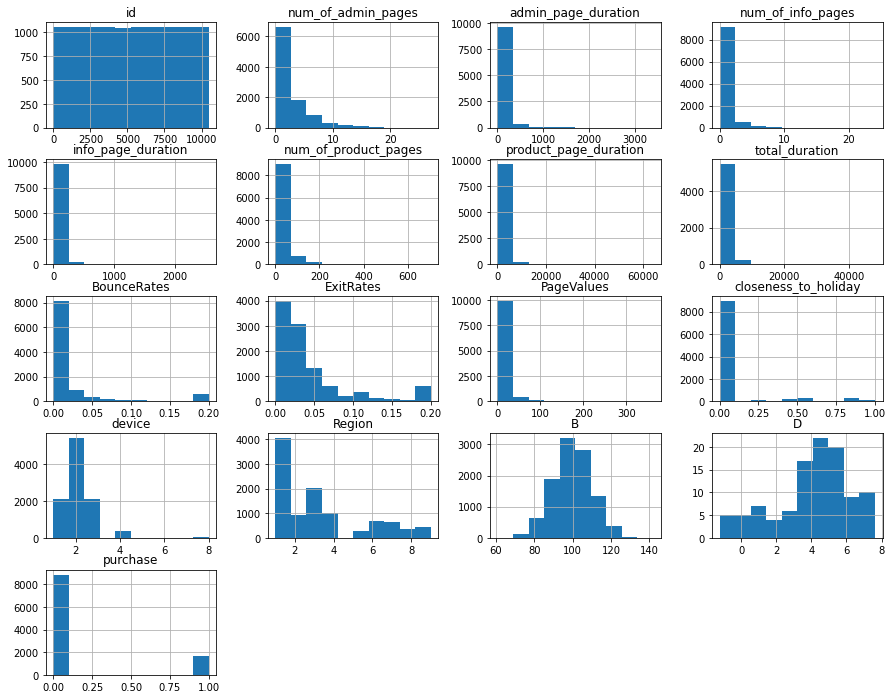

In [37]:
data.hist(figsize=(15,12))

<AxesSubplot:>

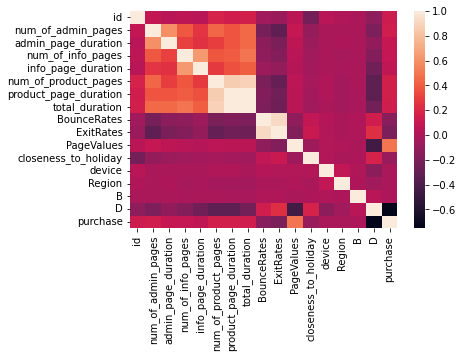

In [ ]:
corr = data.corr()
sb.heatmap(corr)

## explore D
d's seem to have mostly nan values

In [ ]:
valid_ds = X.loc[~np.isnan(X.D)]
print(Y.iloc[valid_ds.id].loc[Y==1].shape)

suc_from_d =  valid_ds.shape[0]

suc_total = Y.loc[Y==1].shape[0]

print('D might explain maybe : ', str(suc_from_d/suc_total * 100)[:3], '% from all success')



(15,)
D might explain maybe :  6.4 % from all success


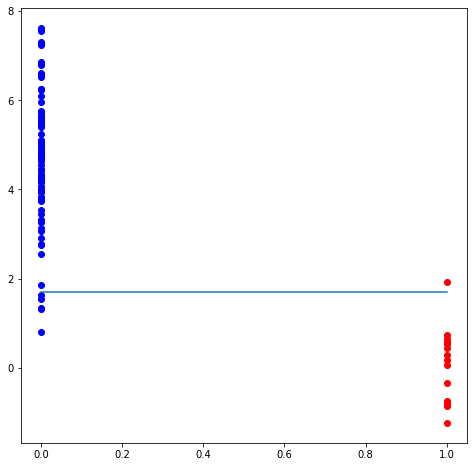

In [ ]:
ys = Y.loc[valid_ds.id]

plotted_d = pd.DataFrame({'d': valid_ds.D, 'y': ys})
plotted_d0 = plotted_d.loc[plotted_d.y == 0]
plotted_d1 = plotted_d.loc[plotted_d.y == 1]

plt.figure(figsize=(8,8))
plt.plot(plotted_d0.y,plotted_d0.d,  'bo')
# plt.xlabel('id')
# plt.ylabel('d value')
plt.plot(plotted_d1.y,plotted_d1.d,  'ro')
line = [1.7 for i in range(2)]
plt.plot(line)
plt.show()



ValueError: X must have 2 or fewer dimensions

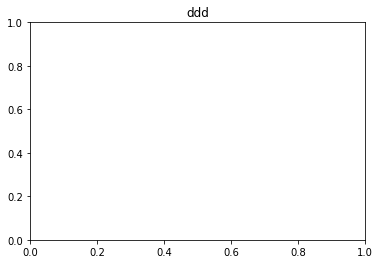

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('ddd')
ax1.boxplot([plotted_d1.values, plotted_d0.values])
plt.show()
